In [14]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import numpy as np
import pyVIA.core as via
import warnings
import pickle
warnings.filterwarnings('ignore')

In [15]:
def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

In [16]:
df = pd.read_csv('../NeuronalFeatureSpace/analysis/VIA.out.GABA.DI.csv', sep=',')
print(df)

                      barcode  label    UMAP_1    UMAP_2     LSI_1     LSI_2  \
1    _di_0_AAACGAAAGAAACGCC-1     43 -2.049174  1.265168  0.824750  0.751113   
2    _di_0_AAACGAAAGAAGCCGT-1     54  2.046333 -2.652457 -1.144128 -0.019114   
3    _di_0_AAACTCGTCATTCGGA-1     43 -1.381443  2.141605  0.428429  0.957844   
4    _di_0_AAACTCGTCCGTCAAA-1     54 -1.781009 -1.417021 -0.525269  0.512487   
5    _di_0_AAATGAGAGACTAATG-1     43 -3.417074  0.458302 -0.144395  0.603104   
..                        ...    ...       ...       ...       ...       ...   
632  _di_2_TTCATTGTCGTTGTAG-1     83  3.670232  4.135385 -1.676277 -3.032206   
633  _di_2_TTCGATTAGTATACGA-1     15  4.286125 -4.885147 -0.171293 -0.273767   
634  _di_2_TTCTGTAAGCTGAAAT-1     43 -3.211021  4.010644 -1.011888  0.882498   
635  _di_2_TTTACGTTCCAACGCG-1    109  4.706262  0.168911 -0.229841 -1.005610   
636  _mb_0_ATGTCGATCTTTCGAT-1     43 -1.118261  2.142905  0.438818  0.543680   

        LSI_3     LSI_4     LSI_5     L

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


number cells 636


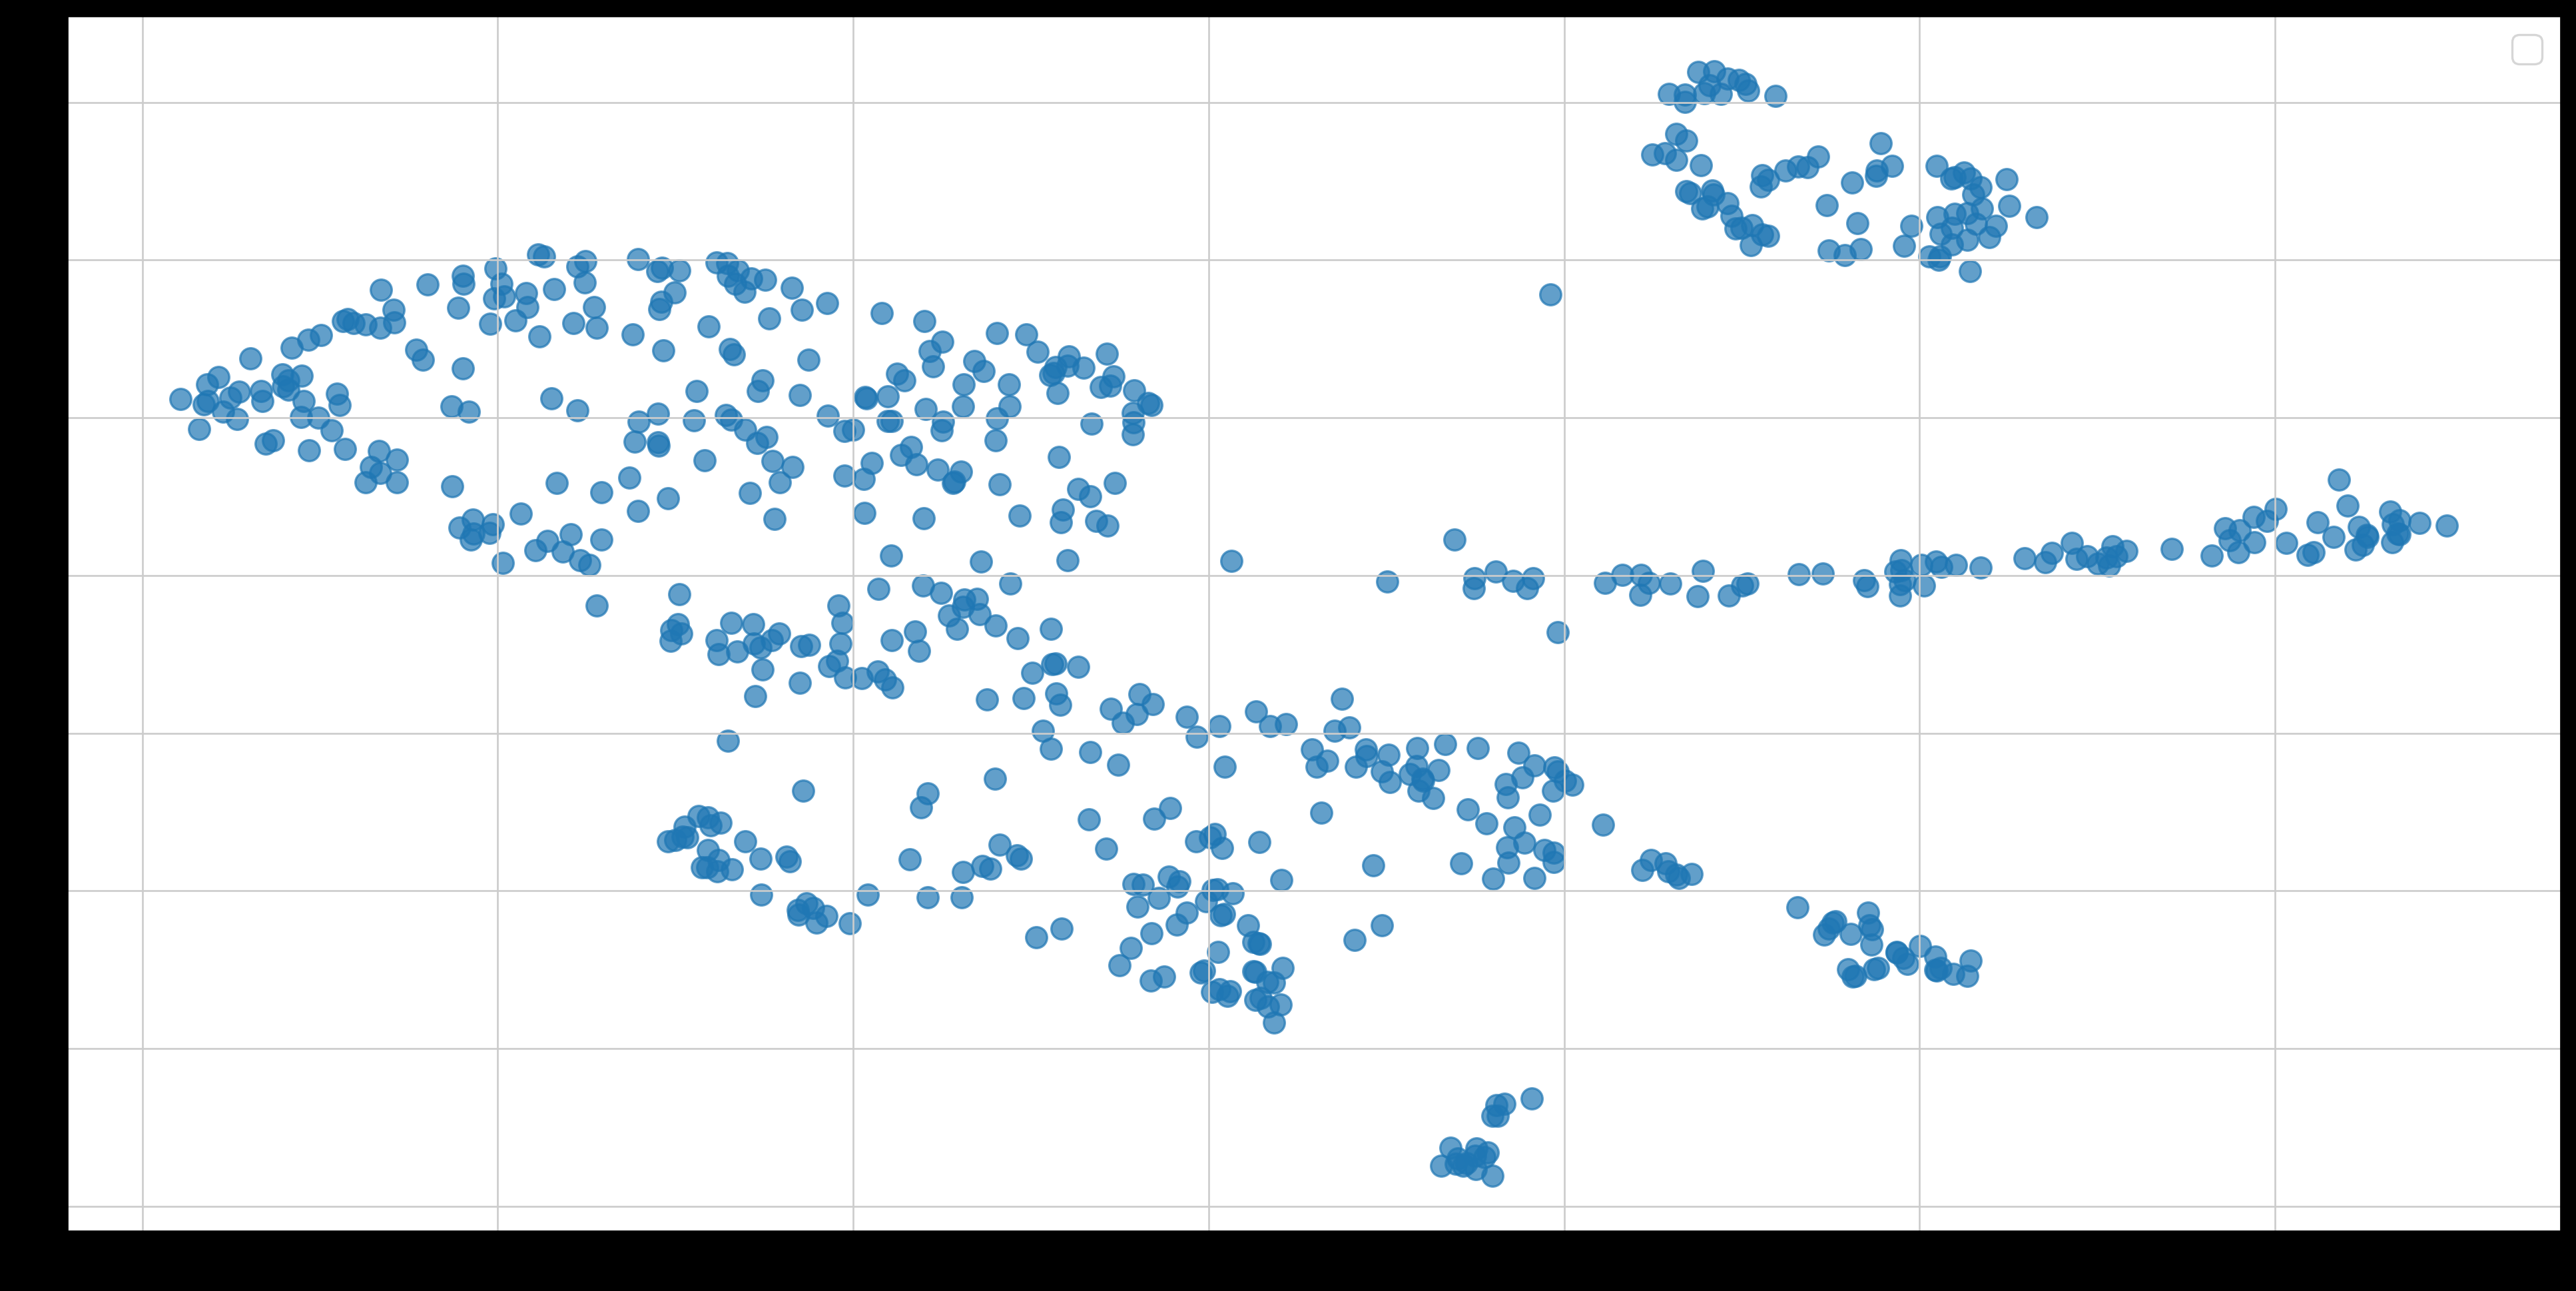

In [17]:
print('number cells', df.shape[0])

SVDcol = ["LSI_" + str(a) for a in range(2,60)]

UMAPcol = ["UMAP_1","UMAP_2"]
embedding = np.array(df[UMAPcol])

fig, ax = plt.subplots(figsize=[20,10])
ax.scatter(embedding[:,0], embedding[:,1], alpha=0.7, s=90)

plt.legend(fontsize='large', markerscale=1.3)
plt.show()

In [288]:
# Rerun point

# Setting VIA parameters
knn = 17
random_seed = 42
v0_too_big_factor=0.65
v1_too_big_factor=0.3
jac_std_global=0.55
dist_std_local=0.5
cluster_graph_pruning_std=0.1
pseudotime_threshold_TS=55
alpha_teleport = 0.98
num_sim_branch_probability = 1000

#v0 = via.VIA(X_in, true_label, jac_std_global=0.5, dist_std_local=1, knn=knn,
 #        too_big_factor=0.3, root_user=root, dataset=dataset, random_seed=random_seed,is_coarse=True, preserve_disconnected=False

root, dataset =  ['15'], 'group'

In [289]:
numeric_labels=df['label'].values.tolist()
character_labels = [str(g) for g in numeric_labels]

In [290]:
# Running VIA coarse
X_in = df[SVDcol].values

v0 = via.VIA(X_in, true_label=character_labels, jac_std_global=jac_std_global, cluster_graph_pruning_std=cluster_graph_pruning_std, knn=knn, dist_std_local=dist_std_local, num_mcmc_simulations=num_sim_branch_probability,  
         too_big_factor=v0_too_big_factor,pseudotime_threshold_TS=pseudotime_threshold_TS,root_user=root, alpha_teleport = alpha_teleport, dataset=dataset, random_seed=random_seed,is_coarse=True, preserve_disconnected_after_pruning=False, edgebundle_pruning_twice = True) 
v0.run_VIA()

2023-09-04 12:04:37.048501	Running VIA over input data of 636 (samples) x 58 (features)
2023-09-04 12:04:37.048912	Knngraph has 17 neighbors
2023-09-04 12:04:37.235644	Finished global pruning of 17-knn graph used for clustering. Kept 67.7 % of edges. 
2023-09-04 12:04:37.239483	Number of connected components used for clustergraph  is 1
2023-09-04 12:04:37.252807	The number of components in the original full graph is 1
2023-09-04 12:04:37.252851	For downstream visualization purposes we are also constructing a low knn-graph 
2023-09-04 12:04:37.491480	Commencing community detection
2023-09-04 12:04:37.499729	Finished running Leiden algorithm. Found 43 clusters.
2023-09-04 12:04:37.499990	Merging 24 very small clusters (<10)
2023-09-04 12:04:37.500481	Finished detecting communities. Found 19 communities
2023-09-04 12:04:37.500563	Making cluster graph. Global cluster graph pruning level: 0.1
2023-09-04 12:04:37.503217	Graph has 1 connected components before pruning
2023-09-04 12:04:37.5045

(<Figure size 2250x2250 with 22 Axes>,
 <AxesSubplot:title={'center':'Cluster Composition. K=17. ncomp = 58'}>,
 <AxesSubplot:title={'center':'Pseudotime'}>)

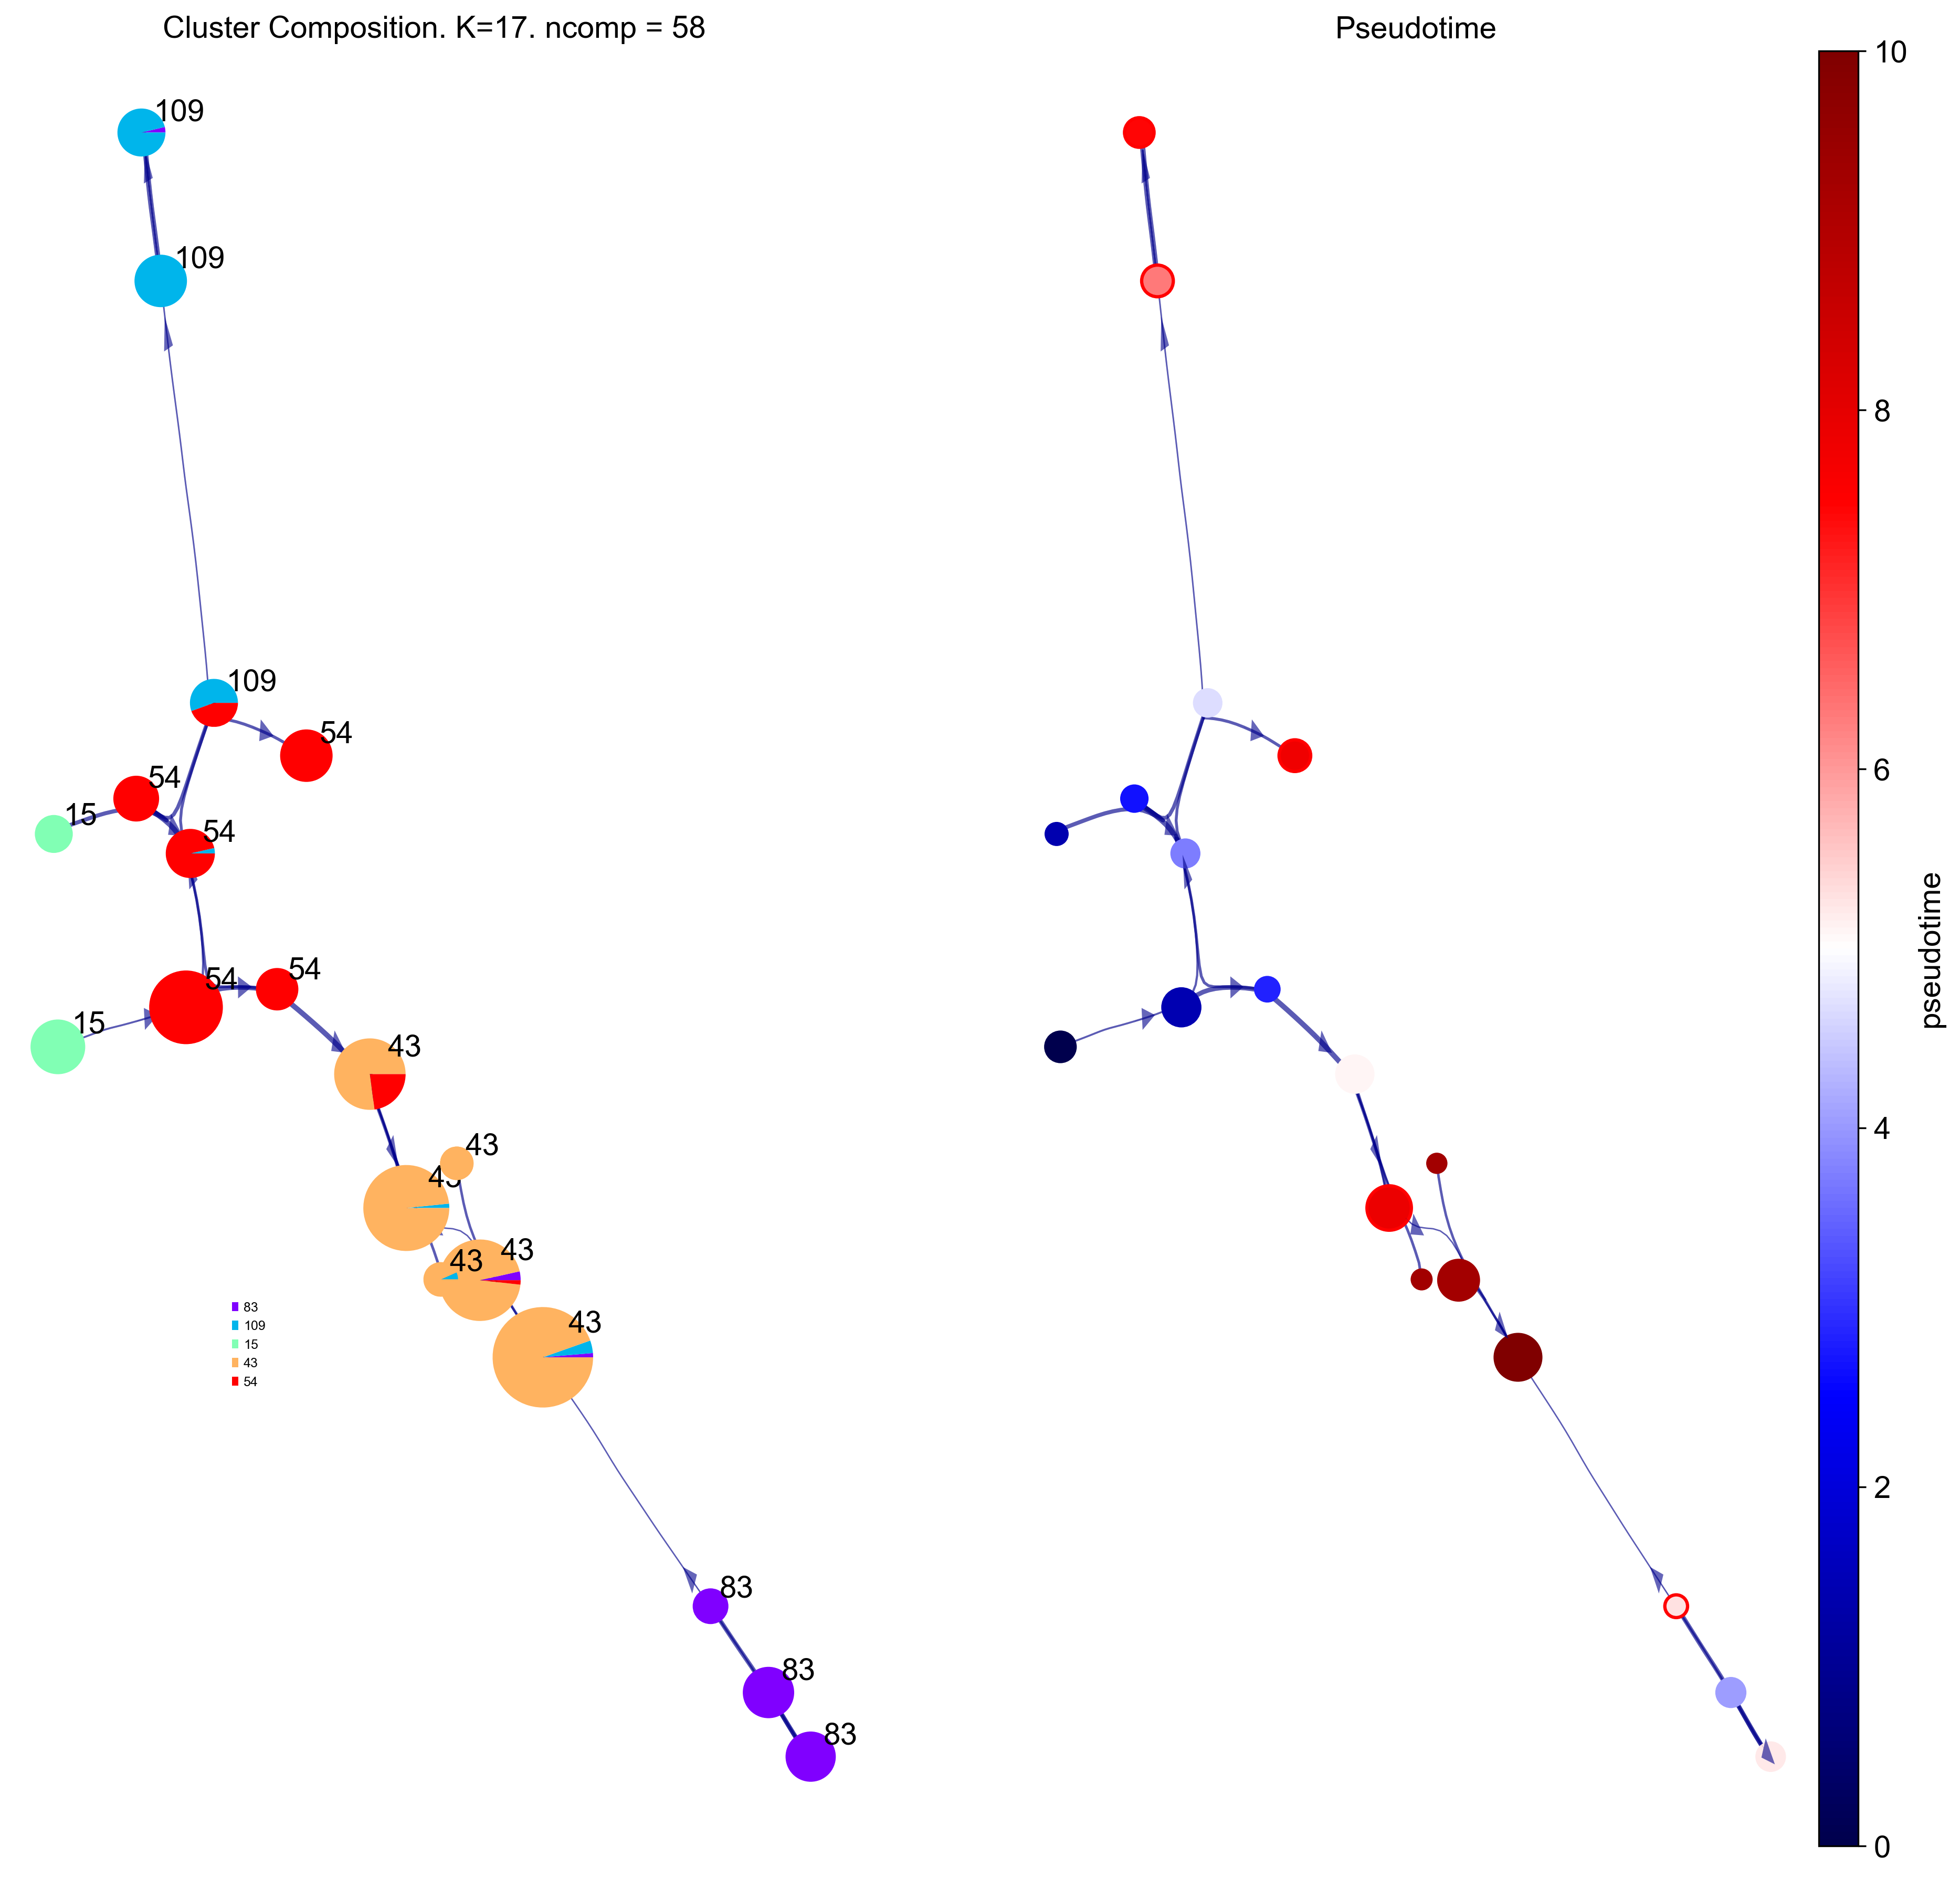

In [291]:
plt.rcParams["figure.figsize"]=15,15
via.draw_piechart_graph(v0,type_data='pt', title='E14 GABA', cmap='seismic', ax_text=False)

In [292]:
save_object(v0, 'v0.pkl')

(<Figure size 3600x3600 with 1 Axes>,
 <AxesSubplot:title={'center':'Streamplot'}>)

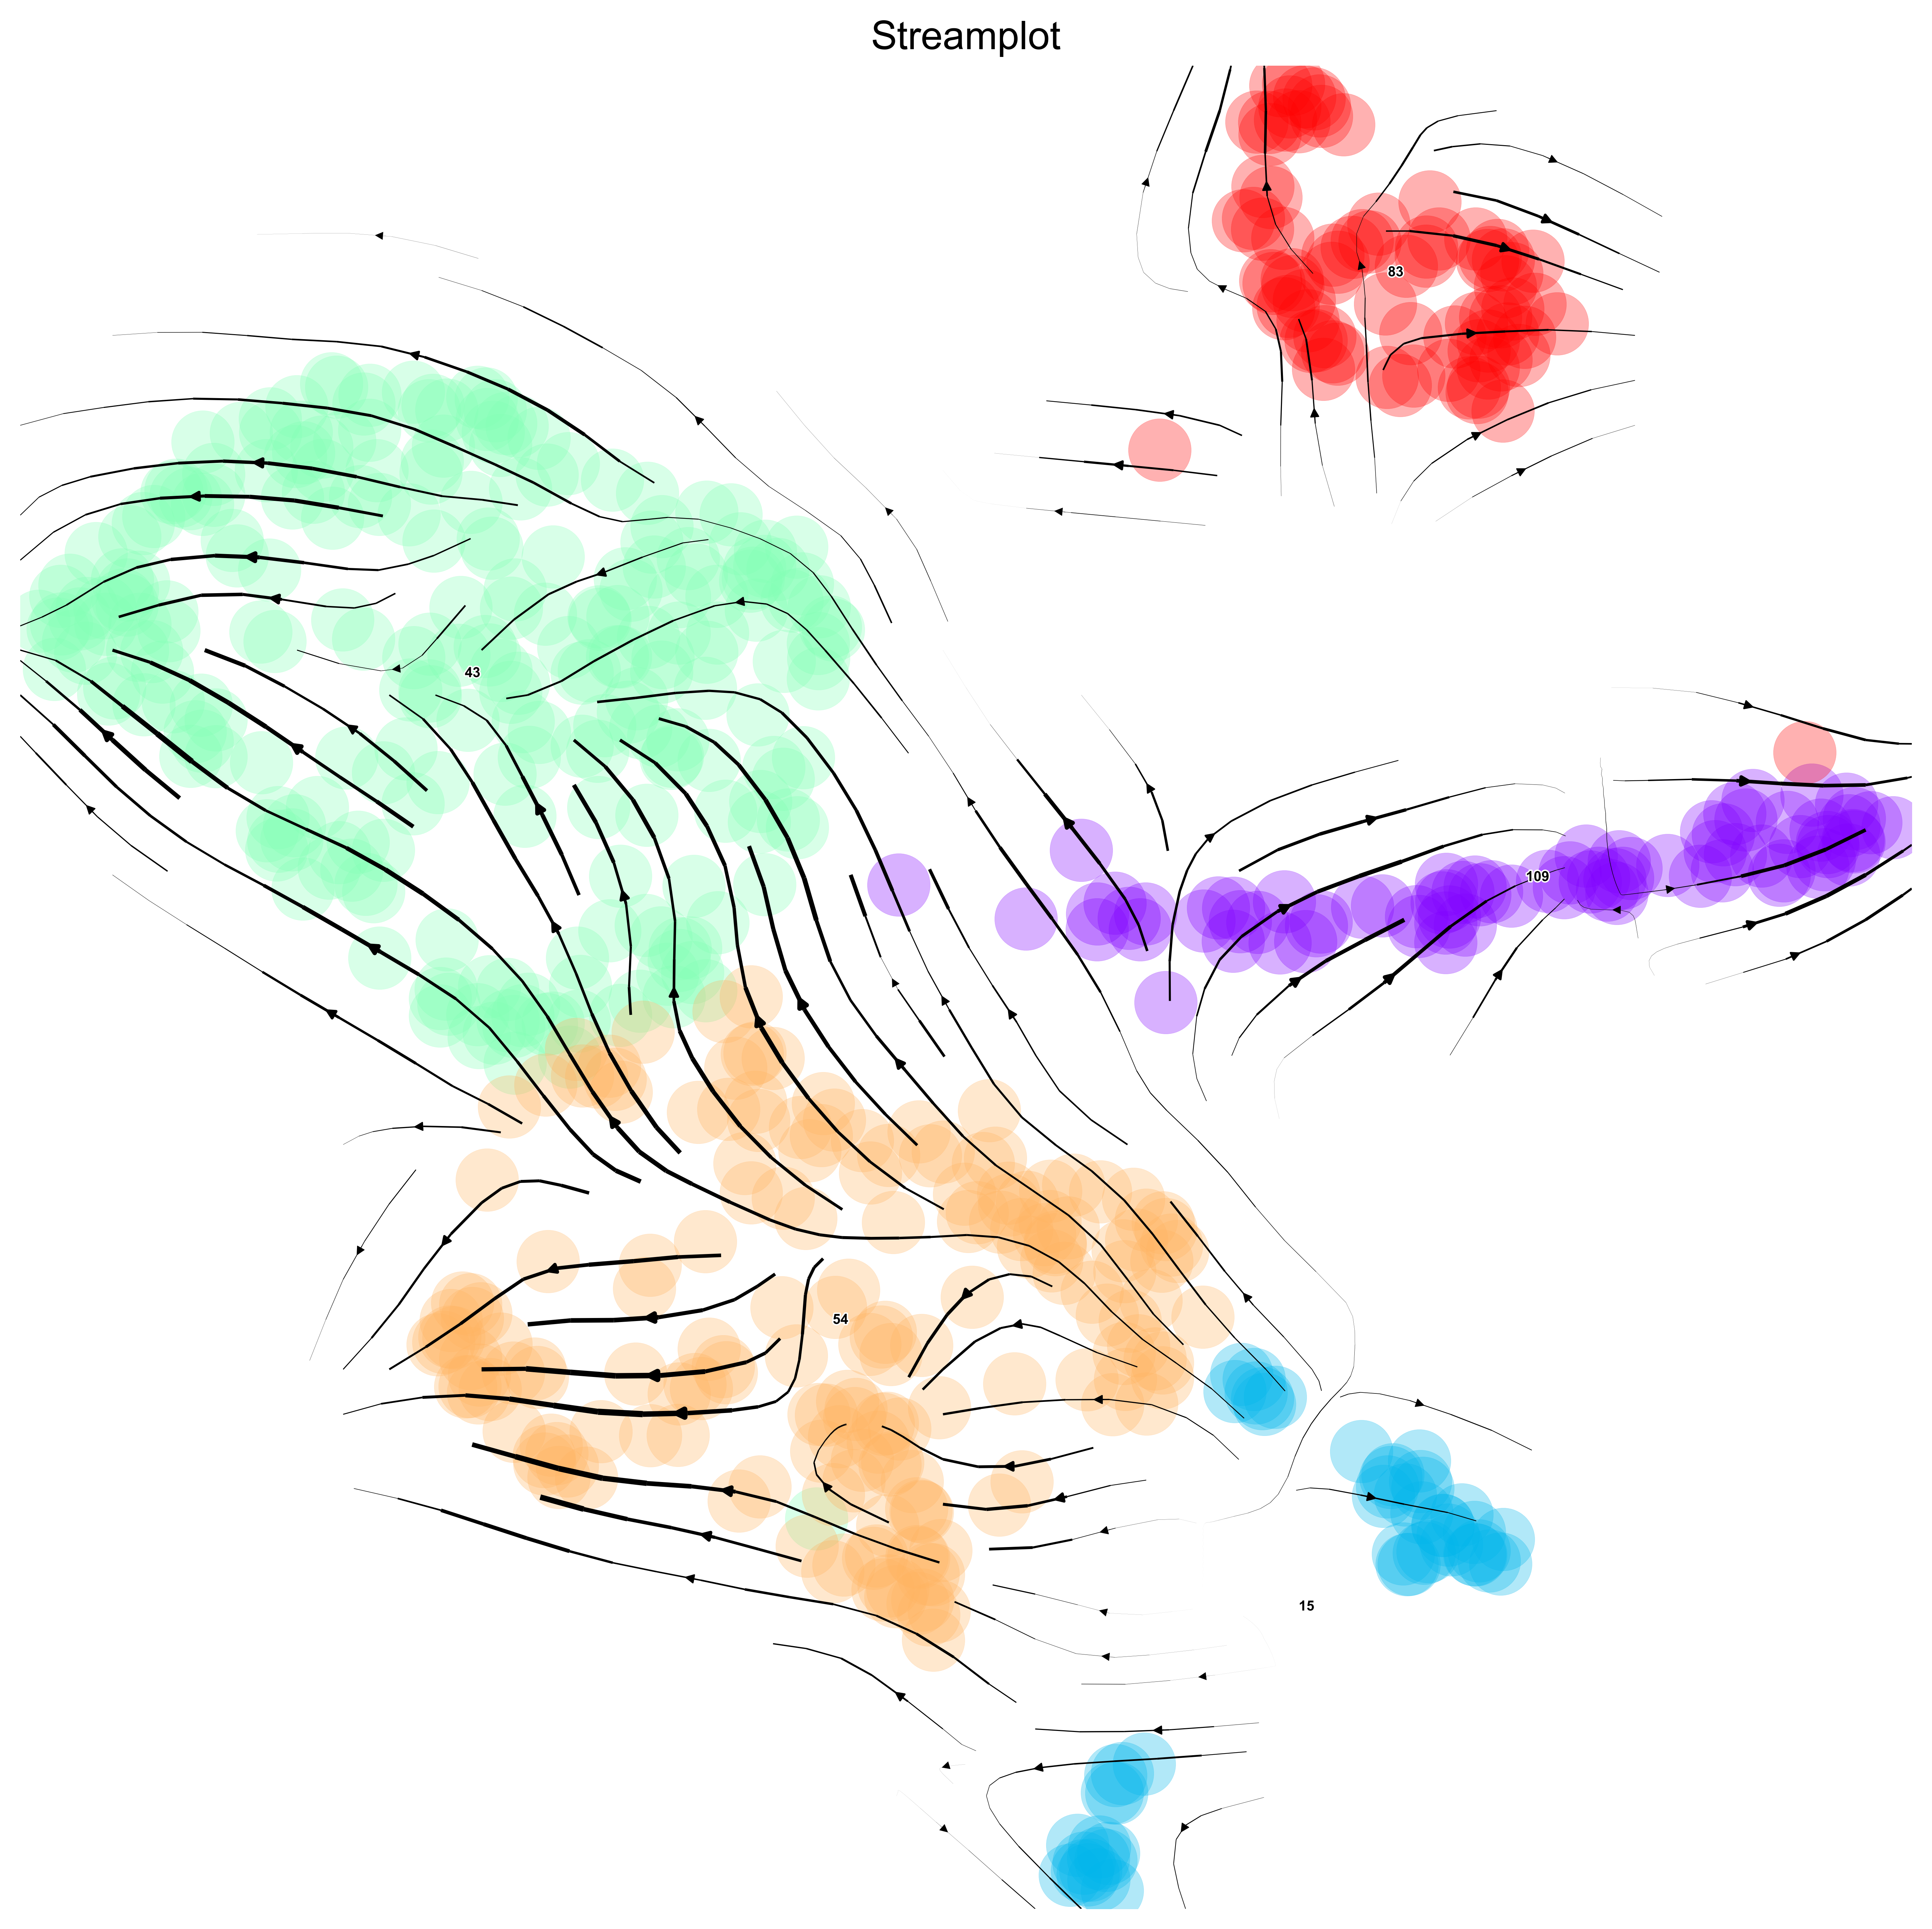

In [293]:
#draw a field plot of cell level directionality on umap
plt.rcParams["figure.figsize"]=12,12
via.via_streamplot(via_coarse=v0, embedding=embedding, scatter_size=500, scatter_alpha=0.3, smooth_transition=3, linewidth=1.2, density_stream=1.4)

In [294]:
plt.rcParams["figure.figsize"]=20,20
v1 = via.VIA(X_in, true_label=character_labels, jac_std_global=jac_std_global, dist_std_local=dist_std_local, knn=knn,
         too_big_factor=v1_too_big_factor, root_user=root, cluster_graph_pruning_std=cluster_graph_pruning_std, is_coarse=False,num_mcmc_simulations=num_sim_branch_probability,
         preserve_disconnected_after_pruning=True,pseudotime_threshold_TS=pseudotime_threshold_TS, alpha_teleport = alpha_teleport, dataset=dataset, random_seed=random_seed,via_coarse = v0, edgebundle_pruning_twice = True)
v1.run_VIA()

2023-09-04 12:04:47.647963	Running VIA over input data of 636 (samples) x 58 (features)
2023-09-04 12:04:47.648066	Knngraph has 17 neighbors
2023-09-04 12:04:47.730931	Finished global pruning of 17-knn graph used for clustering. Kept 67.7 % of edges. 
2023-09-04 12:04:47.730970	Commencing community detection
2023-09-04 12:04:47.739867	Finished running Leiden algorithm. Found 43 clusters.
2023-09-04 12:04:47.740110	Merging 24 very small clusters (<10)
2023-09-04 12:04:47.740533	Finished detecting communities. Found 19 communities
2023-09-04 12:04:47.740583	Making cluster graph. Global cluster graph pruning level: 0.1
2023-09-04 12:04:47.743889	Graph has 1 connected components before pruning
2023-09-04 12:04:47.745584	Graph has 1 connected components before pruning
2023-09-04 12:04:47.745957	Graph has 2 connected components after reconnecting
2023-09-04 12:04:47.746080	0.0% links trimmed from local pruning relative to start
2023-09-04 12:04:47.746095	72.3% links trimmed from global pruni

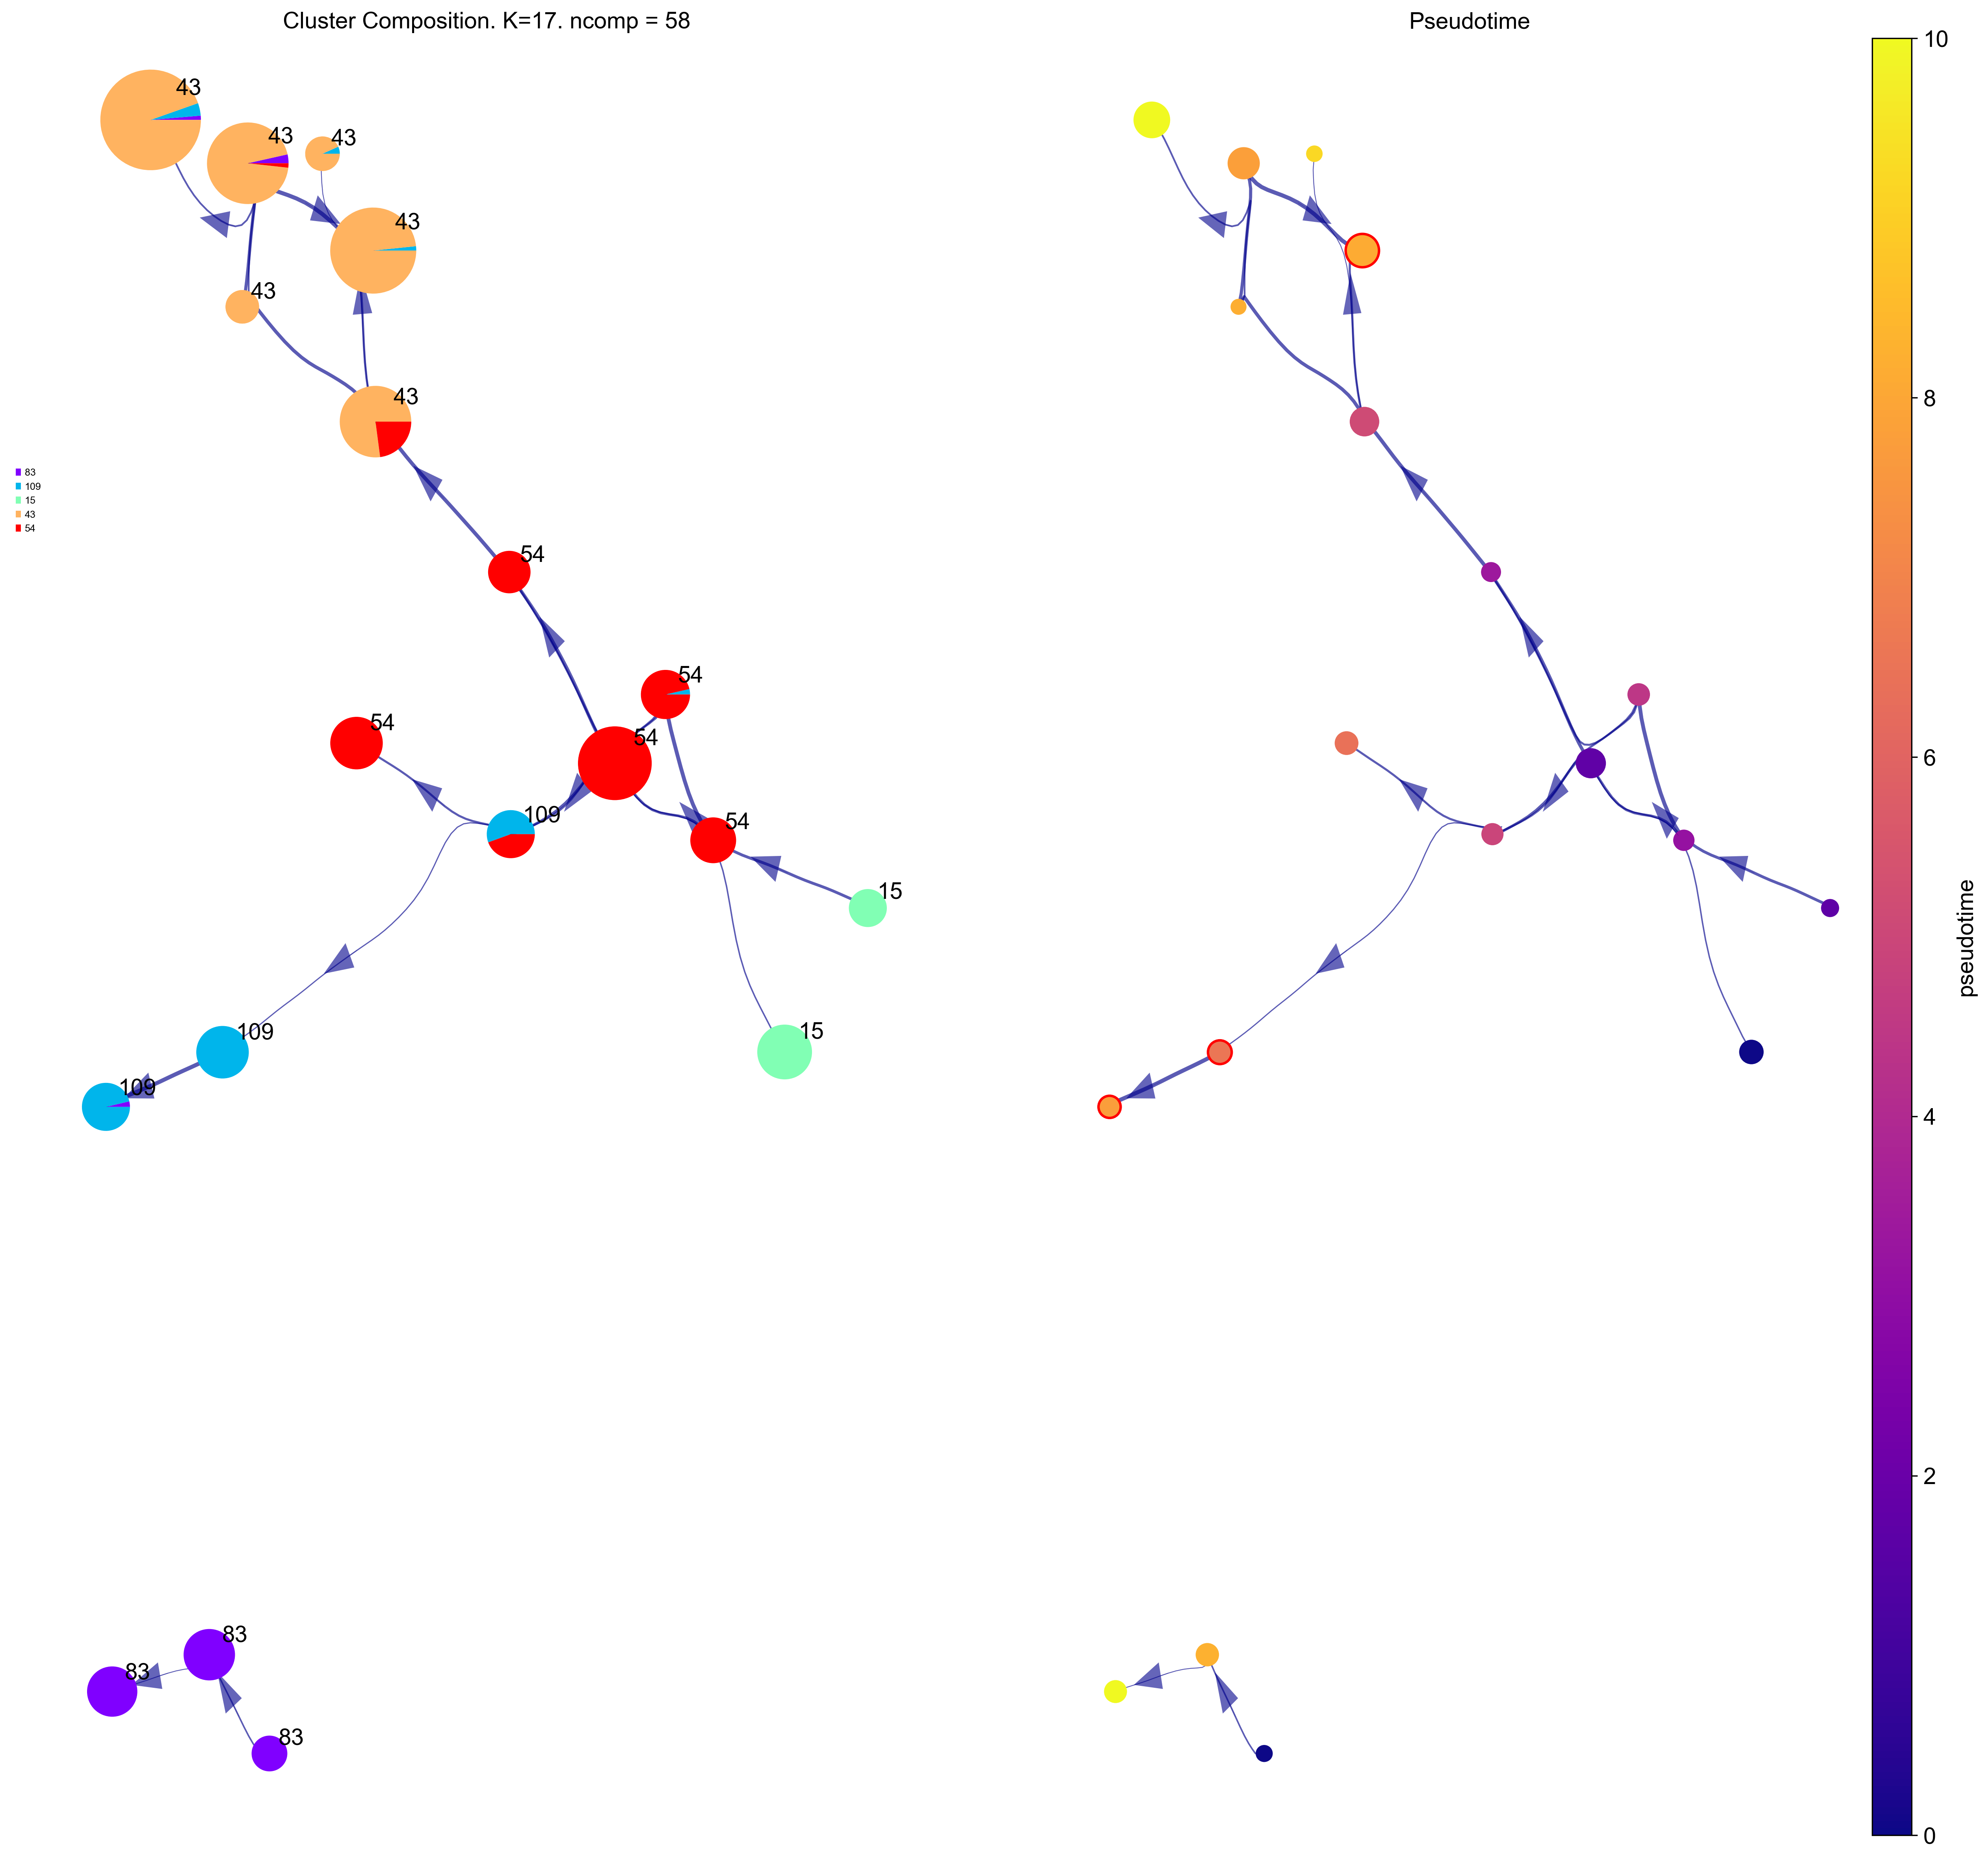

In [298]:
plt.rcParams["figure.figsize"]=20,20
plt.rcParams['legend.loc'] = "upper left"

via.draw_piechart_graph(v1,type_data='pt', ax_text=False)
plt.savefig("E14_DI_GABA_VIA.pdf", format="pdf", bbox_inches="tight")

In [296]:
save_object(v1, 'v1.pkl')